In [16]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score


# Load dataset
df = pd.read_csv('/content/MaterialStrength.csv')

# Menampilkan 5 data teratas untuk memahami dataset
print(df.head())

# Identifikasi kolom yang memiliki data kategorikal
categorical_cols = ['x14', 'x15']  # Contoh kolom kategorikal yang perlu diubah

# Menggunakan LabelEncoder untuk mengubah data kategorikal menjadi numerik
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['target_feature'])  # Asumsikan 'Target' adalah kolom target
y = df['target_feature']

# Membagi dataset menjadi data latih dan data uji (70% latih, 30% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sekarang X_train dan X_test sudah siap untuk digunakan pada model pembelajaran mesin

      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  


In [17]:
# Membuat model Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_dt = dt_reg.predict(X_test)

# Evaluasi menggunakan MSE dan RMSE
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print(f"Decision Tree Regressor MSE: {mse_dt}")
print(f"Decision Tree Regressor RMSE: {rmse_dt}")

Decision Tree Regressor MSE: 17.198933656957927
Decision Tree Regressor RMSE: 4.147159709603421


In [18]:
# Membuat model k-NN Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_knn = knn_reg.predict(X_test)

# Evaluasi menggunakan MSE dan RMSE
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f"k-NN Regressor MSE: {mse_knn}")
print(f"k-NN Regressor RMSE: {rmse_knn}")

k-NN Regressor MSE: 113.2045774368932
k-NN Regressor RMSE: 10.639763974679758


In [19]:
# Membuat model regresi linear biasa
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_linear = linear_reg.predict(X_test)

# Evaluasi menggunakan MSE, RMSE, dan R-squared
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Linear Regression R-squared: {r2_linear}")

Linear Regression MSE: 87.77261830388069
Linear Regression RMSE: 9.36870419555878
Linear Regression R-squared: 0.6756061856928639


In [20]:
# Membuat model regresi polynomial (linear dengan basis fungsi)
degree = 2  # Ubah sesuai kebutuhan (derajat polinomial)
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_poly = poly_model.predict(X_test)

# Evaluasi menggunakan MSE, RMSE, dan R-squared
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Polynomial Regression RMSE: {rmse_poly}")
print(f"Polynomial Regression R-squared: {r2_poly}")

Polynomial Regression MSE: 42.84416251748094
Polynomial Regression RMSE: 6.5455452421842555
Polynomial Regression R-squared: 0.841654703158992


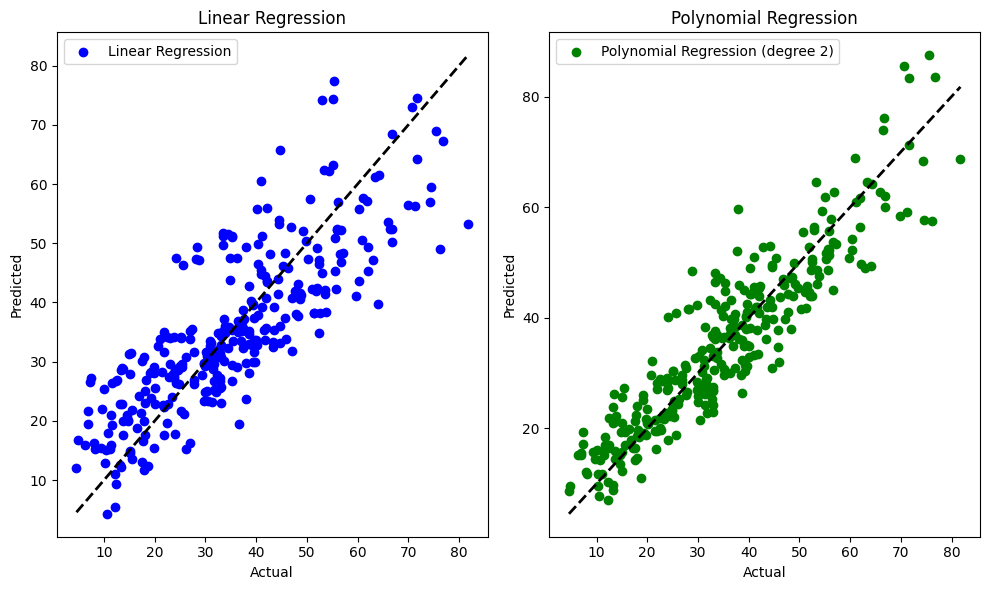

In [21]:
# Membandingkan hasil dengan grafik
plt.figure(figsize=(10,6))

# Plot prediksi model linear
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.legend()

# Plot prediksi model polynomial
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='green', label='Polynomial Regression (degree 2)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
# Setelah evaluasi untuk kedua model (linear dan polynomial)
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Linear Regression R-squared: {r2_linear}")

print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Polynomial Regression RMSE: {rmse_poly}")
print(f"Polynomial Regression R-squared: {r2_poly}")

# Menampilkan perbandingan secara keseluruhan
print("\nModel Comparison:")
print(f"Linear Regression - MSE: {mse_linear}, RMSE: {rmse_linear}, R-squared: {r2_linear}")
print(f"Polynomial Regression (degree {degree}) - MSE: {mse_poly}, RMSE: {rmse_poly}, R-squared: {r2_poly}")


Linear Regression MSE: 87.77261830388069
Linear Regression RMSE: 9.36870419555878
Linear Regression R-squared: 0.6756061856928639
Polynomial Regression MSE: 42.84416251748094
Polynomial Regression RMSE: 6.5455452421842555
Polynomial Regression R-squared: 0.841654703158992

Model Comparison:
Linear Regression - MSE: 87.77261830388069, RMSE: 9.36870419555878, R-squared: 0.6756061856928639
Polynomial Regression (degree 2) - MSE: 42.84416251748094, RMSE: 6.5455452421842555, R-squared: 0.841654703158992
